# LOGISTIC REGRESSION

## Data Exploration

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\excelr\Titanic_train.csv")
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [62]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [64]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [66]:
# Summary statistics
train_summary = train_df.describe(include='all')
print(train_summary)

        PassengerId    Survived      Pclass   Sex         Age       SibSp  \
count    891.000000  891.000000  891.000000   891  714.000000  891.000000   
unique          NaN         NaN         NaN     2         NaN         NaN   
top             NaN         NaN         NaN  male         NaN         NaN   
freq            NaN         NaN         NaN   577         NaN         NaN   
mean     446.000000    0.383838    2.308642   NaN   29.699118    0.523008   
std      257.353842    0.486592    0.836071   NaN   14.526497    1.102743   
min        1.000000    0.000000    1.000000   NaN    0.420000    0.000000   
25%      223.500000    0.000000    2.000000   NaN   20.125000    0.000000   
50%      446.000000    0.000000    3.000000   NaN   28.000000    0.000000   
75%      668.500000    1.000000    3.000000   NaN   38.000000    1.000000   
max      891.000000    1.000000    3.000000   NaN   80.000000    8.000000   

             Parch  Ticket        Fare    Cabin Embarked  
count   891.0000

In [68]:
# Check data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [70]:
# Select only numeric columns
numeric_cols =train_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df =train_df[numeric_cols]

print(numeric_df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


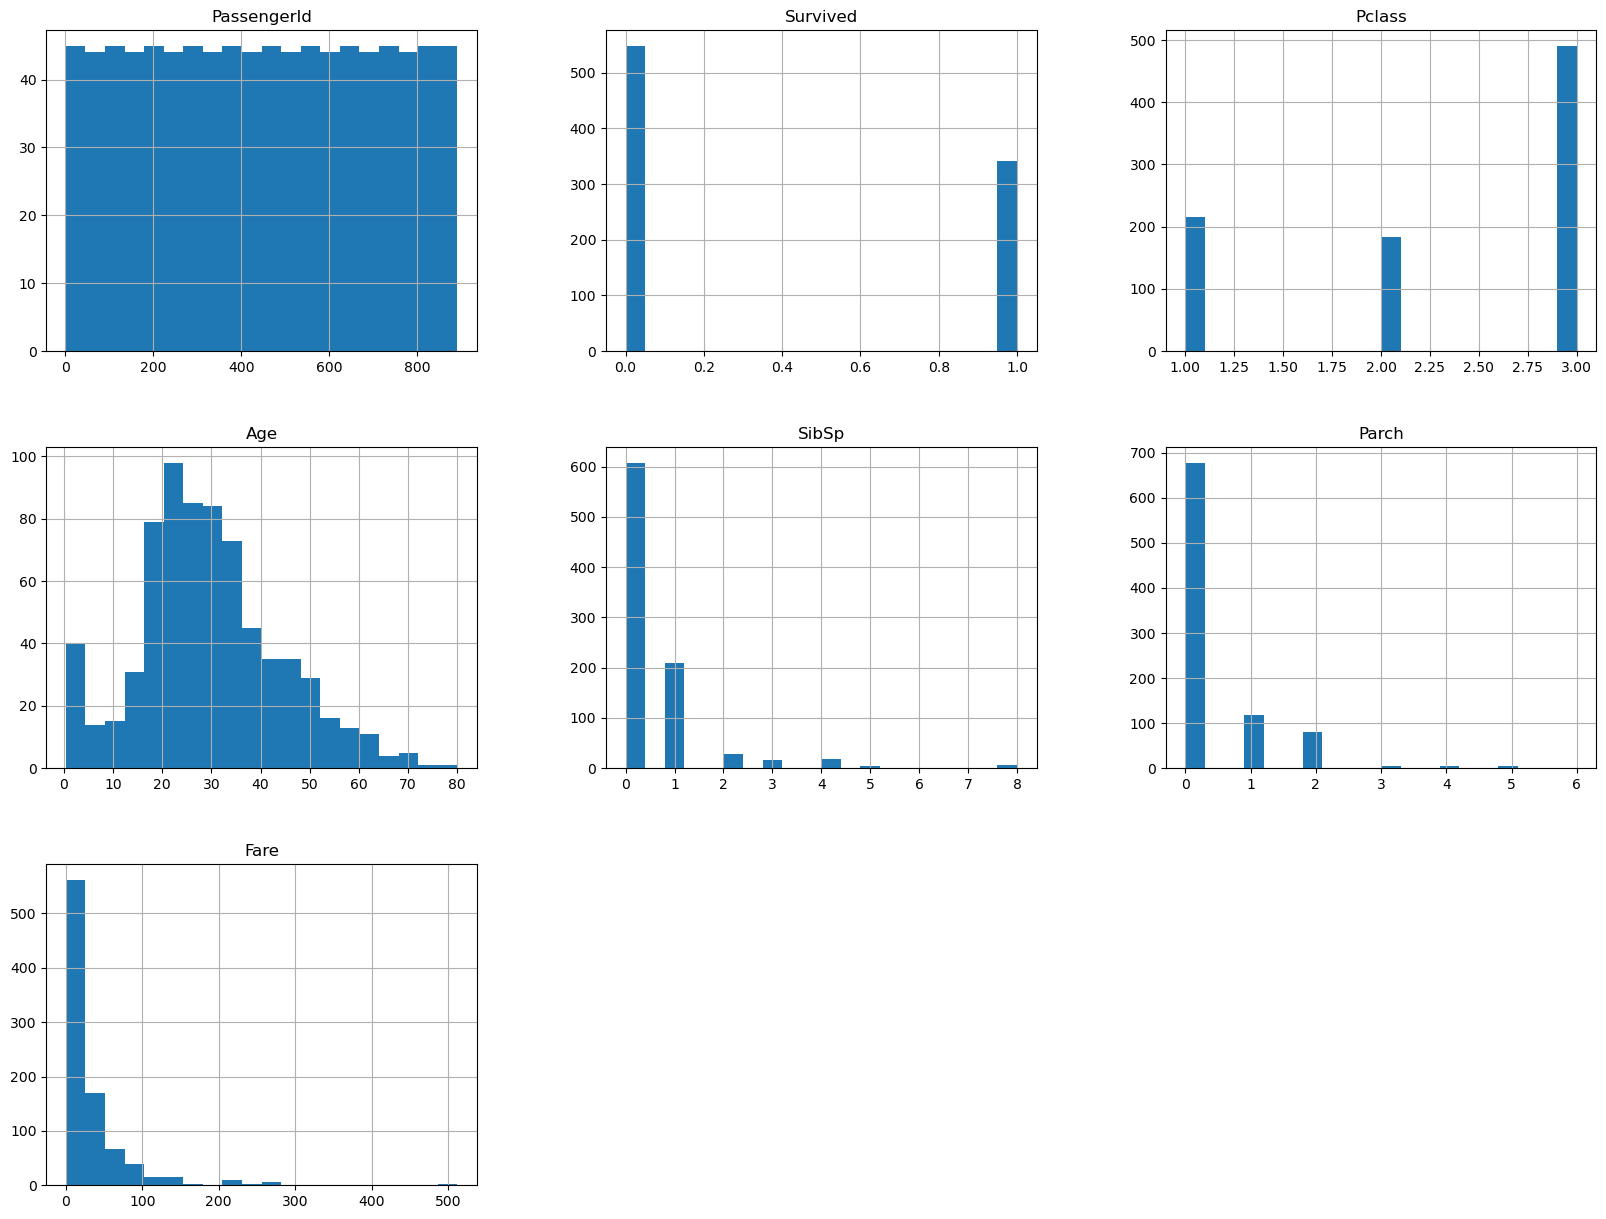

In [93]:
# Histograms for training dataset
numeric_df.hist(bins=20, figsize=(20, 15))
plt.show()

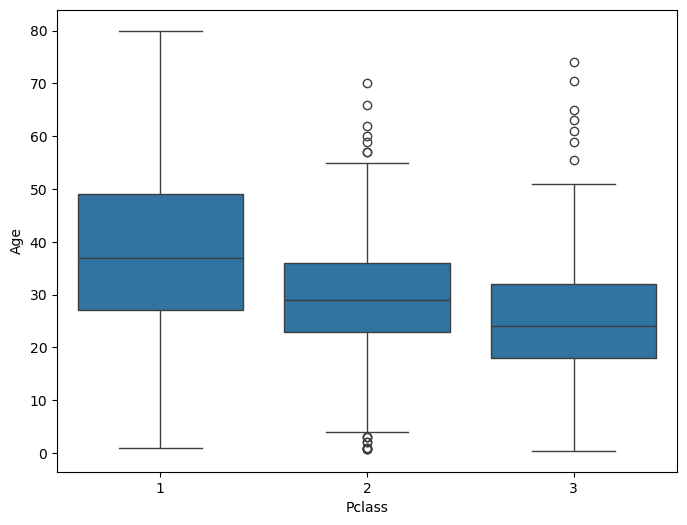

In [95]:
# Box plots for numerical features in the training dataset
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=numeric_df)
plt.show()

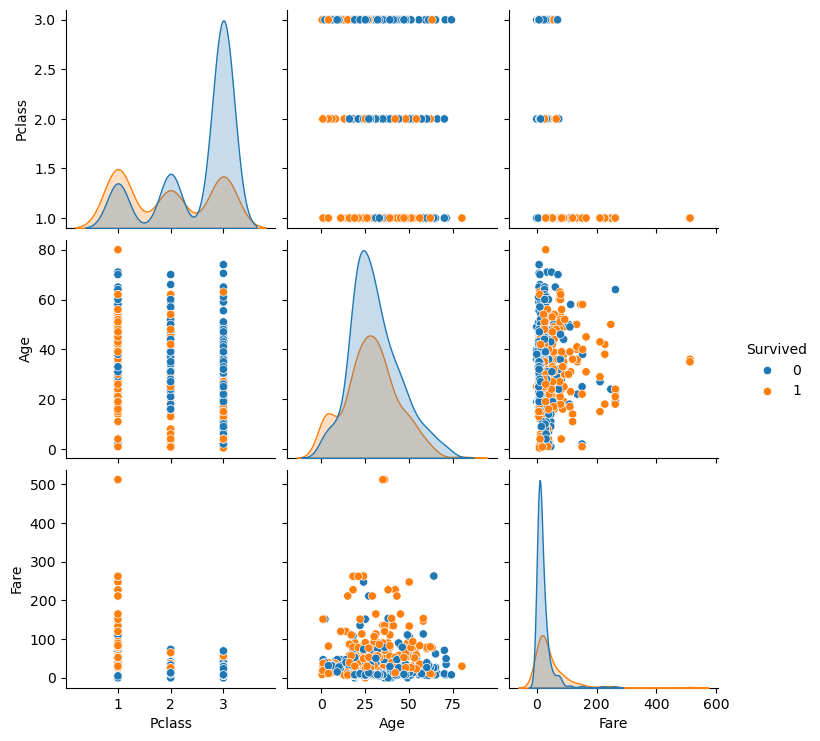

In [97]:
# Pair plots for selected features in the training dataset
sns.pairplot(numeric_df[['Pclass', 'Age', 'Fare', 'Survived']], hue='Survived')
plt.show()

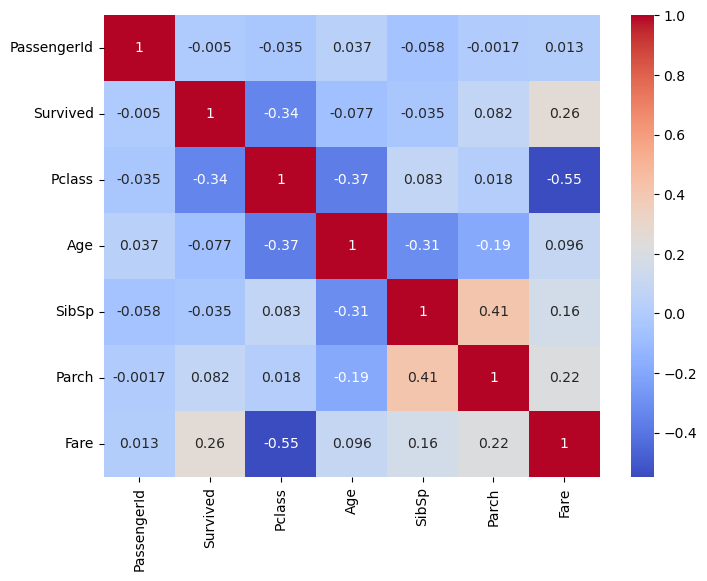

In [101]:
# Correlation matrix for training dataset
train_correlation_matrix =numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(train_correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

In [104]:
## Handle Missing Values
# Fill missing values for numerical features
for col in numeric_cols_train:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    

# Fill missing values for categorical features
categorical_cols_train = train_df.select_dtypes(include=['object']).columns


for col in categorical_cols_train:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)



print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17996\605767970.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17996\605767970.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [106]:
## Encode categorical variables
# One-hot encoding for training dataset
train_df = pd.get_dummies(train_df, columns=categorical_cols_train)
print(train_df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500       False   
1            2         1       1  38.0      1      0  71.2833        True   
2            3         1       3  26.0      0      0   7.9250        True   
3            4         1       1  35.0      1      0  53.1000        True   
4            5         0       3  35.0      0      0   8.0500       False   

   Sex_male  Ticket_110152  ...  Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  \
0      True          False  ...        False     False      False      False   
1     False          False  ...        False     False      False      False   
2     False          False  ...        False     False      False      False   
3     False          False  ...        False     False      False      False   
4      True          False  ...        False     False      False      False   

   Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  

# Model Building:

## Build the Logistic Regression Model

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
# Separate features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [116]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val

(     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
 331          332       1  45.5      0      0   28.5000       False      True   
 733          734       2  23.0      0      0   13.0000       False      True   
 382          383       3  32.0      0      0    7.9250       False      True   
 704          705       3  26.0      1      0    7.8542       False      True   
 813          814       3   6.0      4      2   31.2750        True     False   
 ..           ...     ...   ...    ...    ...       ...         ...       ...   
 106          107       3  21.0      0      0    7.6500        True     False   
 270          271       1  28.0      0      0   31.0000       False      True   
 860          861       3  41.0      2      0   14.1083       False      True   
 435          436       1  14.0      1      2  120.0000        True     False   
 102          103       1  21.0      0      1   77.2875       False      True   
 
      Ticket_110152  Ticke

## Train the Model

In [118]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evaluation:

## Evaluate Performance

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on the validation set
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432
F1-score: 0.7746478873239436
ROC-AUC score: 0.8947232947232946


## Visualize the ROC Curve

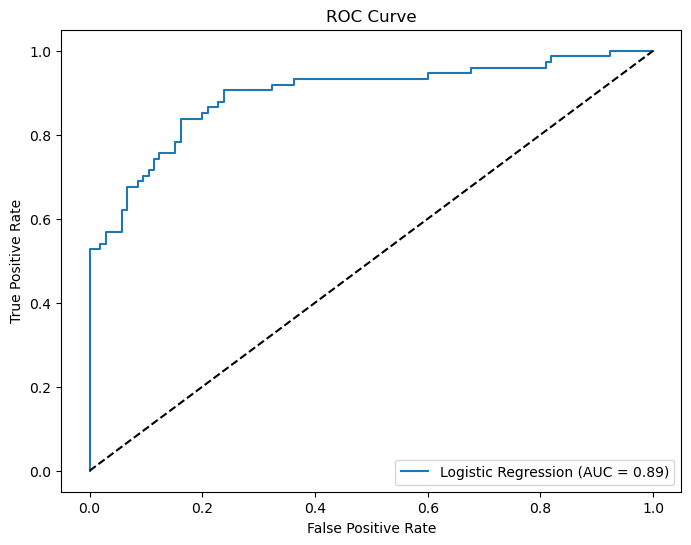

In [127]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Interpretation:

##  Interpret the Coefficients

In [130]:
# Get the coefficients and the feature names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

               Feature  Coefficient
6           Sex_female     1.644128
88         Ticket_1601     1.612719
570  Ticket_C.A. 37671     1.317939
245       Ticket_29106     1.109345
449      Ticket_367226     1.054294
..                 ...          ...
345      Ticket_347088    -0.952854
201        Ticket_2665    -0.987225
403      Ticket_349909    -1.052822
341      Ticket_347082    -1.086872
7             Sex_male    -1.132625

[839 rows x 2 columns]


# Discuss the Significance of Features
The significance of the features in predicting survival probability can be observed from the magnitude and sign of the coefficients:

Positive Coefficients: Indicate that an increase in the feature value increases the log-odds of survival. For example, if a feature like 'Fare' has a positive coefficient, it means that higher fares are associated with higher survival rates.

Negative Coefficients: Indicate that an increase in the feature value decreases the log-odds of survival. For example, if 'Pclass' has a negative coefficient, it means that being in a higher class (1st class) is associated with higher survival rates compared to lower classes.

Magnitude of Coefficients: The larger the absolute value of a coefficient, the more significant the feature is in predicting survival.

In [134]:
# Interpret the coefficients
for index, row in coefficients.iterrows():
    print(f"{row['Feature']}: A unit increase in {row['Feature']} changes the log-odds of survival by {row['Coefficient']}.")


Sex_female: A unit increase in Sex_female changes the log-odds of survival by 1.6441276137092415.
Ticket_1601: A unit increase in Ticket_1601 changes the log-odds of survival by 1.6127185583499377.
Ticket_C.A. 37671: A unit increase in Ticket_C.A. 37671 changes the log-odds of survival by 1.3179389754100939.
Ticket_29106: A unit increase in Ticket_29106 changes the log-odds of survival by 1.1093450867709234.
Ticket_367226: A unit increase in Ticket_367226 changes the log-odds of survival by 1.0542942188587314.
Ticket_347742: A unit increase in Ticket_347742 changes the log-odds of survival by 1.0391974552283538.
Ticket_347077: A unit increase in Ticket_347077 changes the log-odds of survival by 1.0085587985604385.
Ticket_STON/O 2. 3101269: A unit increase in Ticket_STON/O 2. 3101269 changes the log-odds of survival by 0.8468509250927614.
Ticket_STON/O 2. 3101289: A unit increase in Ticket_STON/O 2. 3101289 changes the log-odds of survival by 0.833163239254217.
Ticket_2908: A unit incre

# Interview Questions:

## Difference Between Precision and Recall

### Precision: 
It measures the accuracy of the positive predictions. Specifically, precision is the ratio of true positive predictions to the total number of positive predictions made by the model (i.e., the sum of true positives and false positives). In simple terms, it answers the question, "Of all the instances that the model predicted as positive, how many were actually positive?"
### Recall: 
It measures the ability of the model to find all the relevant cases within a dataset. Recall is the ratio of true positive predictions to the total number of actual positive instances (i.e., the sum of true positives and false negatives). It answers the question, "Of all the actual positive instances, how many did the model correctly identify?"

## Cross-Validation and Its Importance in Binary Classification

Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It's particularly important in binary classification for several reasons:

Avoids Overfitting: By validating the model on multiple subsets of the data, cross-validation helps ensure that the model generalizes well to new, unseen data rather than just fitting the training data.

Provides Reliable Performance Metrics: Since the model's performance is averaged over multiple folds, cross-validation offers a more stable and unbiased estimate of how well the model performs.

Efficient Use of Data: Cross-validation maximizes the use of the dataset by ensuring that every data point is used for both training and validation at some point.

Example of k-Fold Cross-Validation: In k-fold cross-validation, the dataset is divided into k folds. The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, each time with a different fold as the validation set. The performance metrics are averaged over all k trials.